In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC



In [3]:
# Read file and convert file to csv and then use it for future use
df = []
with open('week2_dataset.php', 'r') as f:
    i = f.readlines()
    i = i[1:]
    data = [line.strip() for line in i]
    data = [d.split(",") for d in data]
    df = pd.DataFrame(data, columns=['x_1','x_2','output'])

In [4]:
graph_labels = ['-1 Actual', '1 Actual', '-1 Predicted', '1 Predicted']

### Logistic Regression
a)
    i. Visualise the data you downloaded by placing a marker on a 2D plot for each
pair of feature values i.e. for each row in the data. On the plot the x-axis should be the value of the first feature, the y-axis the value of the second feature and the marker should be, for example, a + marker when the target value is +1 and a o when the target is −1. Your plot should look similar in style to this (with different data points of course!)

In [5]:
df = df.astype(float)
df['output'] = df['output'].astype(int)
df['output_binary'] = df['output'].replace(-1, 0)
df.dtypes

x_1              float64
x_2              float64
output             int64
output_binary      int64
dtype: object

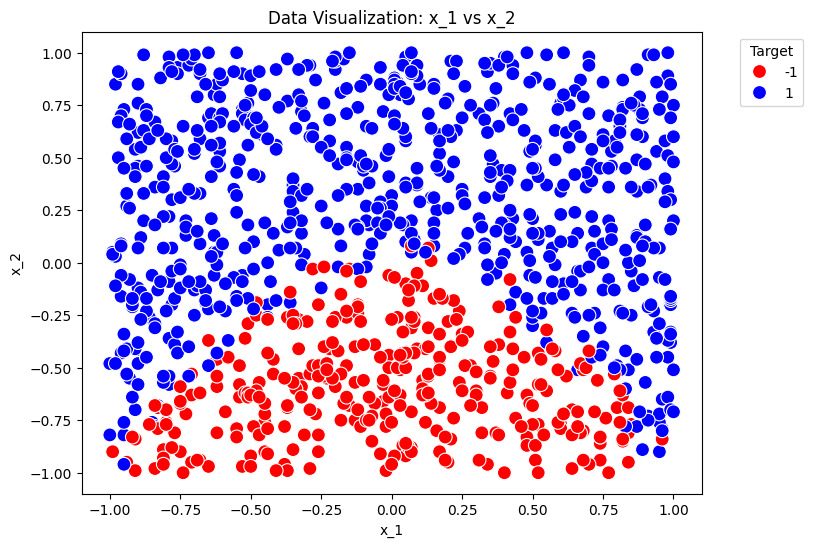

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='x_1', y='x_2',
    hue='output',       
    data=df,
    palette={-1:'red', 1:'blue'}, 
    s=100
)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Data Visualization: x_1 vs x_2')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.show()

(ii) Use sklearn to train a logistic regression classifier on the data. Give the logistic
regression model for predictions and report the parameter values of the trained
model. Discuss e.g. which feature has most infliuence on the prediction, which
features cause the prediction to increase and which to decrease

In [34]:
inp = df[['x_1','x_2']]
output = df['output_binary']

regression = LogisticRegression(fit_intercept=True)
regression.fit(inp, output)

print("b:", regression.intercept_[0])
print("w1:", regression.coef_[0][0])
print("w2:", regression.coef_[0][1])

b: 1.8072216360101805
w1: [0.07278969 5.06768888]
w2: 5.06768887804953


In [11]:
df['predicted_output_binary'] = regression.predict(inp)

In [12]:
df['predicted_output'] = df['predicted_output_binary'].replace(0, -1)

(iii) Now use the trained logistic regression classifier to predict the target values
in the training data. Add these predictions to the 2D plot you generated in
part (i), using a different marker and colour so that the training data and the
predictions can be distinguished. Show the decision boundary of the logistic
regression classifier as a line on the plot (you’ll need to use the parameter values
of the trained model to figure out what line this should be - explain how you
obtain it).

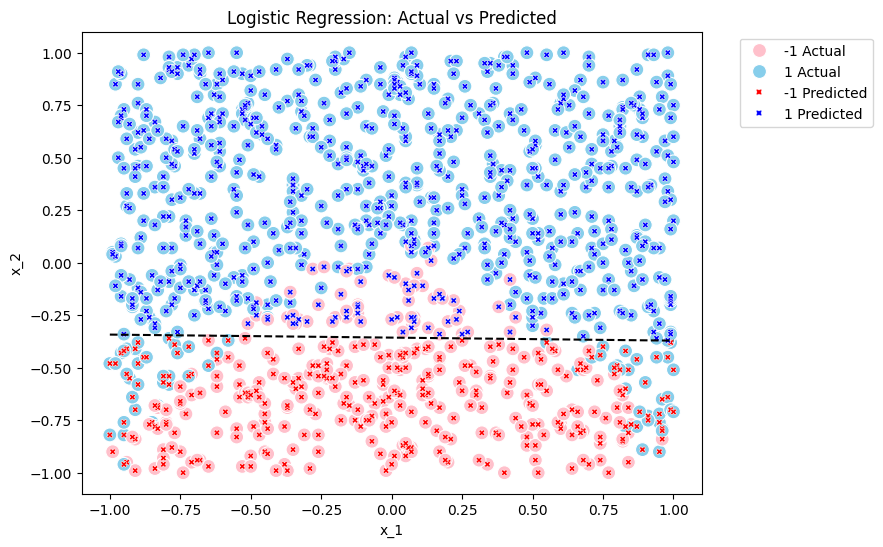

In [13]:
df['predicted_output'] = df['predicted_output'].astype(int)

# Decision boundary
x_vals = np.linspace(df['x_1'].min(), df['x_1'].max(), 100)
y_vals = -(regression.coef_[0][0]*x_vals + regression.intercept_[0])/regression.coef_[0][1]

plt.figure(figsize=(8,6))

# Original points
sns.scatterplot(
    x='x_1', y='x_2',
    hue='output',
    data=df,
    palette={-1:'pink', 1:'skyblue'},
    s=100,
    legend='full'
)

# Predicted points
sns.scatterplot(
    x='x_1', y='x_2',
    hue='predicted_output',
    data=df,
    palette={-1:'red', 1:'blue'},
    s=20,
    marker='X',
    legend='full',  
)

# Decision boundary plot
plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Logistic Regression: Actual vs Predicted')
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend(handles, graph_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

(iv) Briefly comment on how the predictions and the training data compare

In [14]:
#Conclusions
accuracy = accuracy_score(df['output'], df['predicted_output'])
precision = precision_score(df['output'], df['predicted_output'])
recall = recall_score(df['output'], df['predicted_output'])
f1 = f1_score(df['output'], df['predicted_output'])
roc_auc = roc_auc_score(df['output'], df['predicted_output'])
cm = confusion_matrix(df['output'], df['predicted_output'])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC score:", roc_auc)
print("Confusion Matrix", cm)


Accuracy: 0.8708708708708709
Precision: 0.905688622754491
Recall: 0.9016393442622951
F1-Score: 0.9036594473487677
ROC-AUC score: 0.8547830867652937
Confusion Matrix [[265  63]
 [ 66 605]]


,x_1,x_2,output,output_binary,predicted_output_binary,predicted_output,squared_predictions_binary,squared_predictions,squared_prediction
0,0.09,-0.05,-1,0,1,1,1,1,1
1,0.48,-0.63,-1,0,0,-1,0,-1,-1
2,-0.16,-0.26,-1,0,1,1,0,-1,-1
3,0.96,-0.65,1,1,0,-1,1,1,1
4,-0.33,-0.55,-1,0,0,-1,0,-1,-1
5,0.22,-0.74,-1,0,0,-1,0,-1,-1
6,-0.56,0.35,1,1,1,1,1,1,1
7,-0.84,-0.98,-1,0,0,-1,0,-1,-1
8,0.28,-0.49,-1,0,0,-1,0,-1,-1
9,-0.37,0.77,1,1,1,1,1,1,1


### SVM Classifiers
Use sklearn to train linear SVM classifiers on your data (nb: be sure to use the
LinearSVC function in sklearn, not the SVC function).


(i) Train linear SVM classifiers for a wide range of values of the penalty parameter
C e.g. C = 0.001, C = 1, C = 100. Give the SVM model for predictions and
report the parameter values of each trained mode

In [15]:
C_penalties = [0.001, 1, 100]
models = {}
for C in C_penalties:
    svm = LinearSVC(C=C, max_iter=10000, random_state=42)
    svm.fit(inp, output)
    models[C] = svm
    
    print(f"Model for penalty={C}:")
    print("  W1 = ", svm.coef_[0][0])
    print("  W2 = ", svm.coef_[0][1])
    print("  Intercept (b):", svm.intercept_[0])
    print()

Model for penalty=0.001:
  W1 =  0.003642230169552038
  W2 =  0.465672058117645
  Intercept (b): 0.228691419172776

Model for penalty=1:
  W1 =  0.020392878335181604
  W2 =  1.8947031861798747
  Intercept (b): 0.6578538168254331

Model for penalty=100:
  W1 =  0.020848075857074447
  W2 =  1.9155387525690974
  Intercept (b): 0.665901910293073



(ii) Use each of these trained classifiers to predict the target values in the training
data. Plot these predictions and the actual target values from the data, together
with the classifier decision boundary

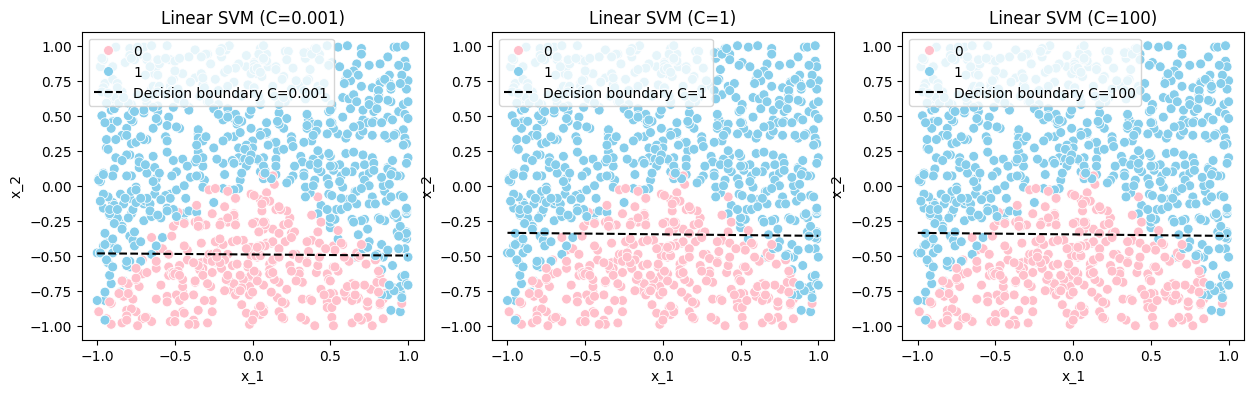

In [16]:
x_vals = np.linspace(inp['x_1'].min(), inp['x_1'].max(), 900)

plt.figure(figsize=(15,4))

for i, C in enumerate(C_penalties):
    svm = models[C]
    y_vals = -(svm.coef_[0][0]*x_vals + svm.intercept_[0])/svm.coef_[0][1]

    plt.subplot(1, 3, i+1)
    
    # Actual data points
    sns.scatterplot(x='x_1', y='x_2', hue='output_binary', data=df, palette={0:'pink',1:'skyblue'}, s=50)
    
    # Decision boundary
    plt.plot(x_vals, y_vals, 'k--', label=f'Decision boundary C={C}')
    
    plt.title(f'Linear SVM (C={C})')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(loc='upper left')


plt.show()

(c) (i) Now create two additional features by adding the square of each feature (i.e.
giving four features in total). Train a logistic regression classifier. Give the
model and the trained parameter values

In [17]:
poly = PolynomialFeatures(degree=2, include_bias=False)
squared = poly.fit_transform(inp)
squared

array([[ 0.09  , -0.05  ,  0.0081, -0.0045,  0.0025],
       [ 0.48  , -0.63  ,  0.2304, -0.3024,  0.3969],
       [-0.16  , -0.26  ,  0.0256,  0.0416,  0.0676],
       ...,
       [ 0.48  , -0.17  ,  0.2304, -0.0816,  0.0289],
       [ 0.    , -0.96  ,  0.    , -0.    ,  0.9216],
       [ 0.05  , -0.86  ,  0.0025, -0.043 ,  0.7396]], shape=(999, 5))

In [27]:
squared_input = pd.DataFrame(squared, columns=poly.get_feature_names_out(['x_1', 'x_2']))
squared_input = squared_input.drop(columns=['x_1 x_2'])
squared_prediction = LogisticRegression(fit_intercept=True)
squared_prediction.fit(squared_input, output)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
print("W1 (x_1) =", squared_prediction.coef_[0][0])
print("W2 (x_2) =", squared_prediction.coef_[0][1])
print("W3 (x1_sq) =", squared_prediction.coef_[0][2])
print("W4 (x2_sq) =", squared_prediction.coef_[0][3])
print("Intercept =", squared_prediction.intercept_[0])

W1 (x_1) = 0.054938354634808936
W2 (x_2) = 6.769015740096657
W3 (x1_sq) = 6.448751443541879
W4 (x2_sq) = -0.9926805818246545
Intercept = 0.41688658263908396


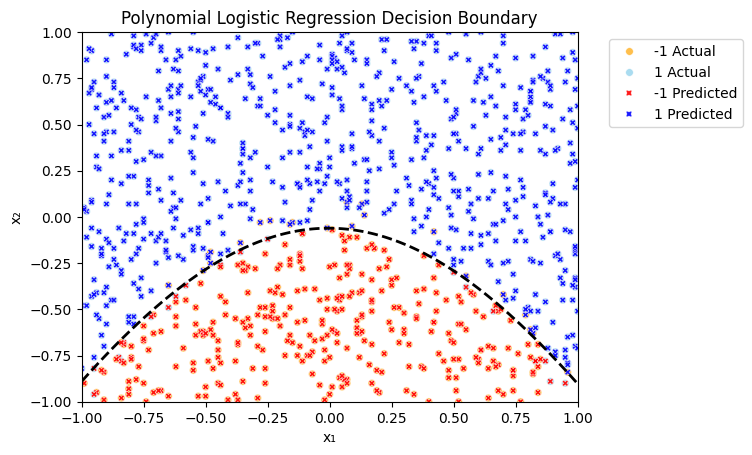

In [30]:
w = squared_prediction.coef_[0]
b = squared_prediction.intercept_[0]
df['squared_predictions_binary'] = squared_prediction.predict(squared_input)
df['squared_prediction'] = df['squared_predictions_binary'].replace(0, -1)

x1_vals = np.linspace(df['x_1'].min(), df['x_1'].max(), 200)
x2_vals = np.linspace(df['x_2'].min(), df['x_2'].max(), 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

Z = w[0]*X1 + w[1]*X2 + w[2]*X1**2 + w[3]*X2**2 + b


# Plot actual points
sns.scatterplot(
    x='x_1', y='x_2',
    hue='output_binary',
    data=df,
    palette={0:'orange', 1:'skyblue'},
    s=30,
    alpha=0.7
)

# Plot predicted points
sns.scatterplot(
    x='x_1', y='x_2',
    hue='squared_predictions_binary',
    data=df,
    palette={0:'red', 1:'blue'},
    s=20,
    marker='X',
    alpha=0.9
)

# Plot the decision boundary (Z=0)
plt.contour(X1, X2, Z, levels=[0], colors='k', linewidths=2, linestyles='--')

plt.title("Polynomial Logistic Regression Decision Boundary")
plt.xlabel("x₁")
plt.ylabel("x₂")
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend(handles, graph_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
num_pos = (df['output'] == 1).sum()
num_neg = (df['output'] == -1).sum()  

In [33]:
print(num_neg, num_pos)

328 671


In [39]:
##Conclusions

print("accuracy of baseline predictor = ", max(num_pos, num_neg)/(num_neg+ num_pos))

squared_accuracy = accuracy_score(df['output'], df['squared_predictions'])
squared_precision = precision_score(df['output'], df['squared_predictions'])
squared_recall = recall_score(df['output'], df['squared_predictions'])
squared_f1 = f1_score(df['output'], df['squared_predictions'])
squared_roc_auc = roc_auc_score(df['output'], df['squared_predictions'])
squared_cm = confusion_matrix(df['output'], df['squared_predictions'])
print("Accuracy:", squared_accuracy)
print("Precision:", squared_precision)
print("Recall:", squared_recall)
print("F1-Score:", squared_f1)
print("ROC-AUC score:", squared_roc_auc)
print("Confusion Matrix", squared_cm)



accuracy of baseline predictor =  0.6716716716716716
Accuracy: 0.9579579579579579
Precision: 0.9673105497771174
Recall: 0.970193740685544
F1-Score: 0.96875
ROC-AUC score: 0.9515602849769184
Confusion Matrix [[306  22]
 [ 20 651]]
